In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def load_data(fname):
    with open(fname) as f:
        data = pd.read_json(f)["data"]['timeseries']
    return data

In [22]:
def plot_results(x, y, preds):
    f, ax2 = plt.subplots()
    f.set_figwidth(10)
    f.set_figheight(5)
    plt.scatter(x,y)
    plt.plot(x,y, '.:')
    if np.shape(preds) == np.shape(y):
        plt.plot(preds)
    else:
        for pred in preds:
            plt.plot(pred)
    ax2.yaxis.grid()
    plt.show()

In [4]:
pl_in = pd.DataFrame(load_data("raw/poland_out.json"))
pl_out = pd.DataFrame(load_data("raw/poland_in.json"))
sl_in = pd.DataFrame(load_data("raw/sl_in.json"))
sl_out = pd.DataFrame(load_data("raw/sl_out.json"))

In [5]:
pl_out.columns

Index(['data_date', 'unix_timestamp', 'individuals'], dtype='object')

In [6]:
pl_in.to_csv("timeseries/pol_in")
pl_out.to_csv("timeseries/pol_out")
sl_in.to_csv("timeseries/svk_in")
sl_out.to_csv("timeseries/svk_out")

In [7]:
pl_in = pd.read_csv("timeseries/pol_in").drop(labels='Unnamed: 0', axis=1, inplace=False)
pl_out = pd.read_csv("timeseries/pol_out").drop(labels='Unnamed: 0', axis=1, inplace=False)
sl_in = pd.read_csv("timeseries/svk_in").drop(labels='Unnamed: 0', axis=1, inplace=False)
sl_out = pd.read_csv("timeseries/svk_out").drop(labels='Unnamed: 0', axis=1, inplace=False)

In [8]:
pl_in.rename(columns={'individuals': 'pol_in'}, inplace=True)
pl_out.rename(columns={'individuals': 'pol_out'}, inplace=True)
sl_in.rename(columns={'individuals': 'sl_in'}, inplace=True)
sl_out.rename(columns={'individuals': 'sl_out'}, inplace=True)

df = pl_in.merge(pl_out.merge(sl_in.merge(sl_out, on=['data_date', 'unix_timestamp']), on=['data_date', 'unix_timestamp']), on=['data_date', 'unix_timestamp'])

In [9]:
df['pol_diff'] = df['pol_in'] - df['pol_out']
df['sl_diff'] = df['sl_in'] - df['sl_out']
df['all_diff'] = df['pol_diff'] + df['sl_diff']

In [10]:
df.to_csv('migration.csv')

In [3]:
df = pd.read_csv('migration.csv')

In [4]:
def plot(df: pd.DataFrame):
    df.plot(y=["pol_in","pol_out","pol_diff"],figsize=(12,6)).grid(axis='y')
    df.plot(y=["sl_in","sl_out","sl_diff"],figsize=(12,6)).grid(axis='y')
    df.plot(y=["all_diff"],figsize=(12,6)).grid(axis='y')

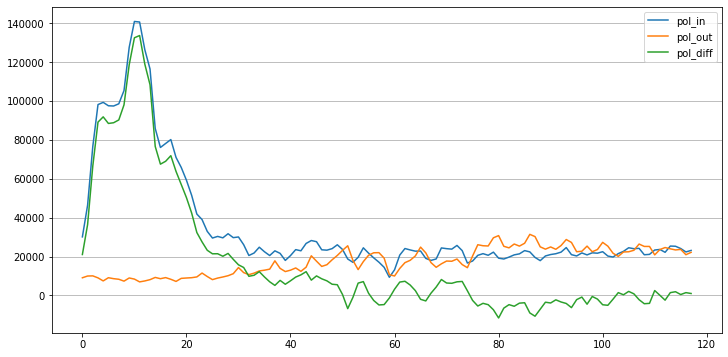

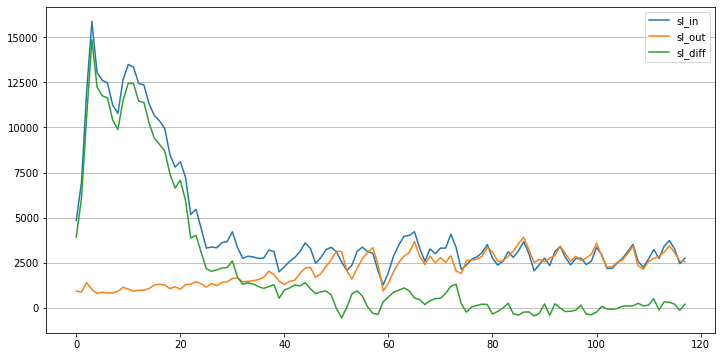

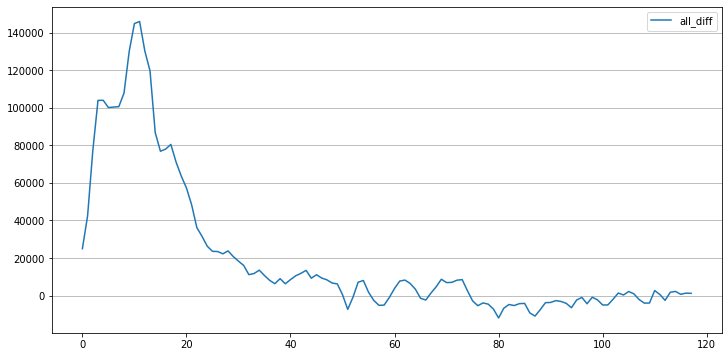

In [5]:
plot(df)

In [17]:
since_may = df.iloc[-35:]
since_may['days_passed'] = range(0, since_may['all_diff'].size)
since_may.head()

C:\Users\xps\AppData\Local\Temp/ipykernel_18688/502627619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  since_may['days_passed'] = range(0, since_may['all_diff'].size)


,Unnamed: 0,data_date,unix_timestamp,pol_in,pol_out,sl_in,sl_out,pol_diff,sl_diff,all_diff,days_passed
83,83,2022-05-18,1652832000,20840,26421,3100,2850,-5581,250,-5331,0
84,84,2022-05-19,1652918400,21362,25342,2797,3133,-3980,-336,-4316,1
85,85,2022-05-20,1653004800,23031,26809,3158,3568,-3778,-410,-4188,2
86,86,2022-05-21,1653091200,22372,31392,3660,3900,-9020,-240,-9260,3
87,87,2022-05-22,1653177600,19530,30230,2996,3227,-10700,-231,-10931,4


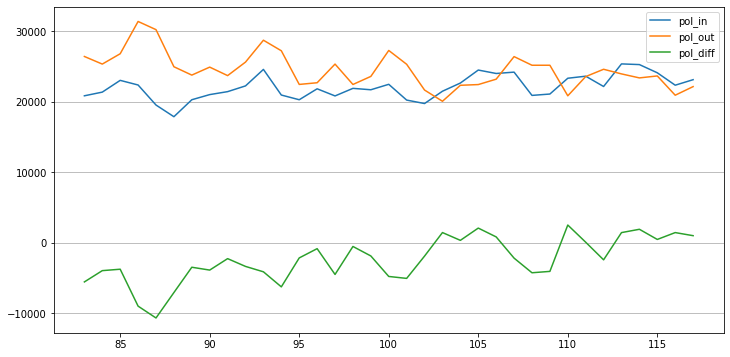

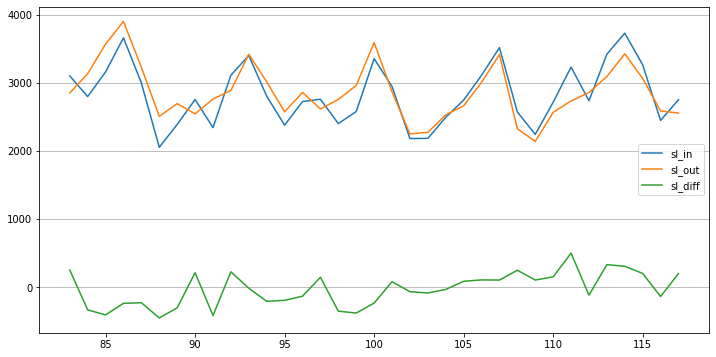

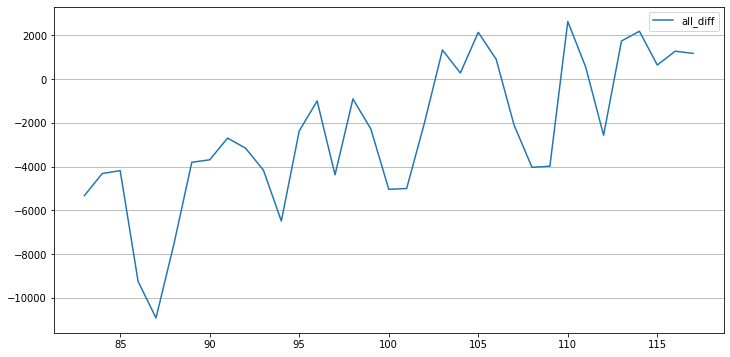

In [18]:
plot(since_may)

In [19]:
x = since_may['days_passed'].to_numpy().reshape(-1,1)
y = since_may['all_diff'].to_numpy().reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [20]:
# linear regression
lr = LinearRegression().fit(x_train, y_train)
# quadratic regression
poly = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
x_2 = poly.fit_transform(x)
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y, random_state=42)
qr = LinearRegression().fit(x_2_train, y_2_train)

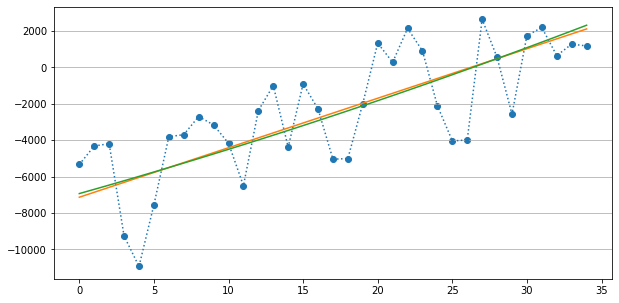

In [23]:
preds = [lr.predict(x), qr.predict(x_2)]
plot_results(x,y,preds)